### Linear Regression for House Price Prediction ML Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's import a housing dataset...

Import USA Estate Sales Dataset

In [2]:
usa = pd.read_csv('Data/RealEstate.csv')

In [3]:
usa

,No,TD,HA,DNMS,NCS,LAT,LONG,PRICE
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


DESCRIPTION
X:
TD - Transaction Date
HA - House Age
DNMS - Distance to the Nearest Metro Station
NCS - Number of Convenience Stores
LAT - Latitude
LONG - Longitude
Y:
PRICE - House Price of Unit Area

Let's remove columns that are not so important

In [4]:
del usa['No']

In [5]:
dataset = pd.DataFrame(usa)

In [6]:
dataset

,TD,HA,DNMS,NCS,LAT,LONG,PRICE
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TD      414 non-null    float64
 1   HA      414 non-null    float64
 2   DNMS    414 non-null    float64
 3   NCS     414 non-null    int64  
 4   LAT     414 non-null    float64
 5   LONG    414 non-null    float64
 6   PRICE   414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [8]:
dataset.describe()

,TD,HA,DNMS,NCS,LAT,LONG,PRICE
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
dataset.describe()

,TD,HA,DNMS,NCS,LAT,LONG,PRICE
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [10]:
dataset.isnull()

,TD,HA,DNMS,NCS,LAT,LONG,PRICE
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False


In [11]:
dataset.isnull().sum()

TD       0
HA       0
DNMS     0
NCS      0
LAT      0
LONG     0
PRICE    0
dtype: int64

### EDA: Exploratory Data Analysis 

In [12]:
dataset.corr()

,TD,HA,DNMS,NCS,LAT,LONG,PRICE
TD,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
HA,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
DNMS,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
NCS,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
LAT,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
LONG,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
PRICE,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


d:\AIML\FinalProject\HousePricePrediction\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


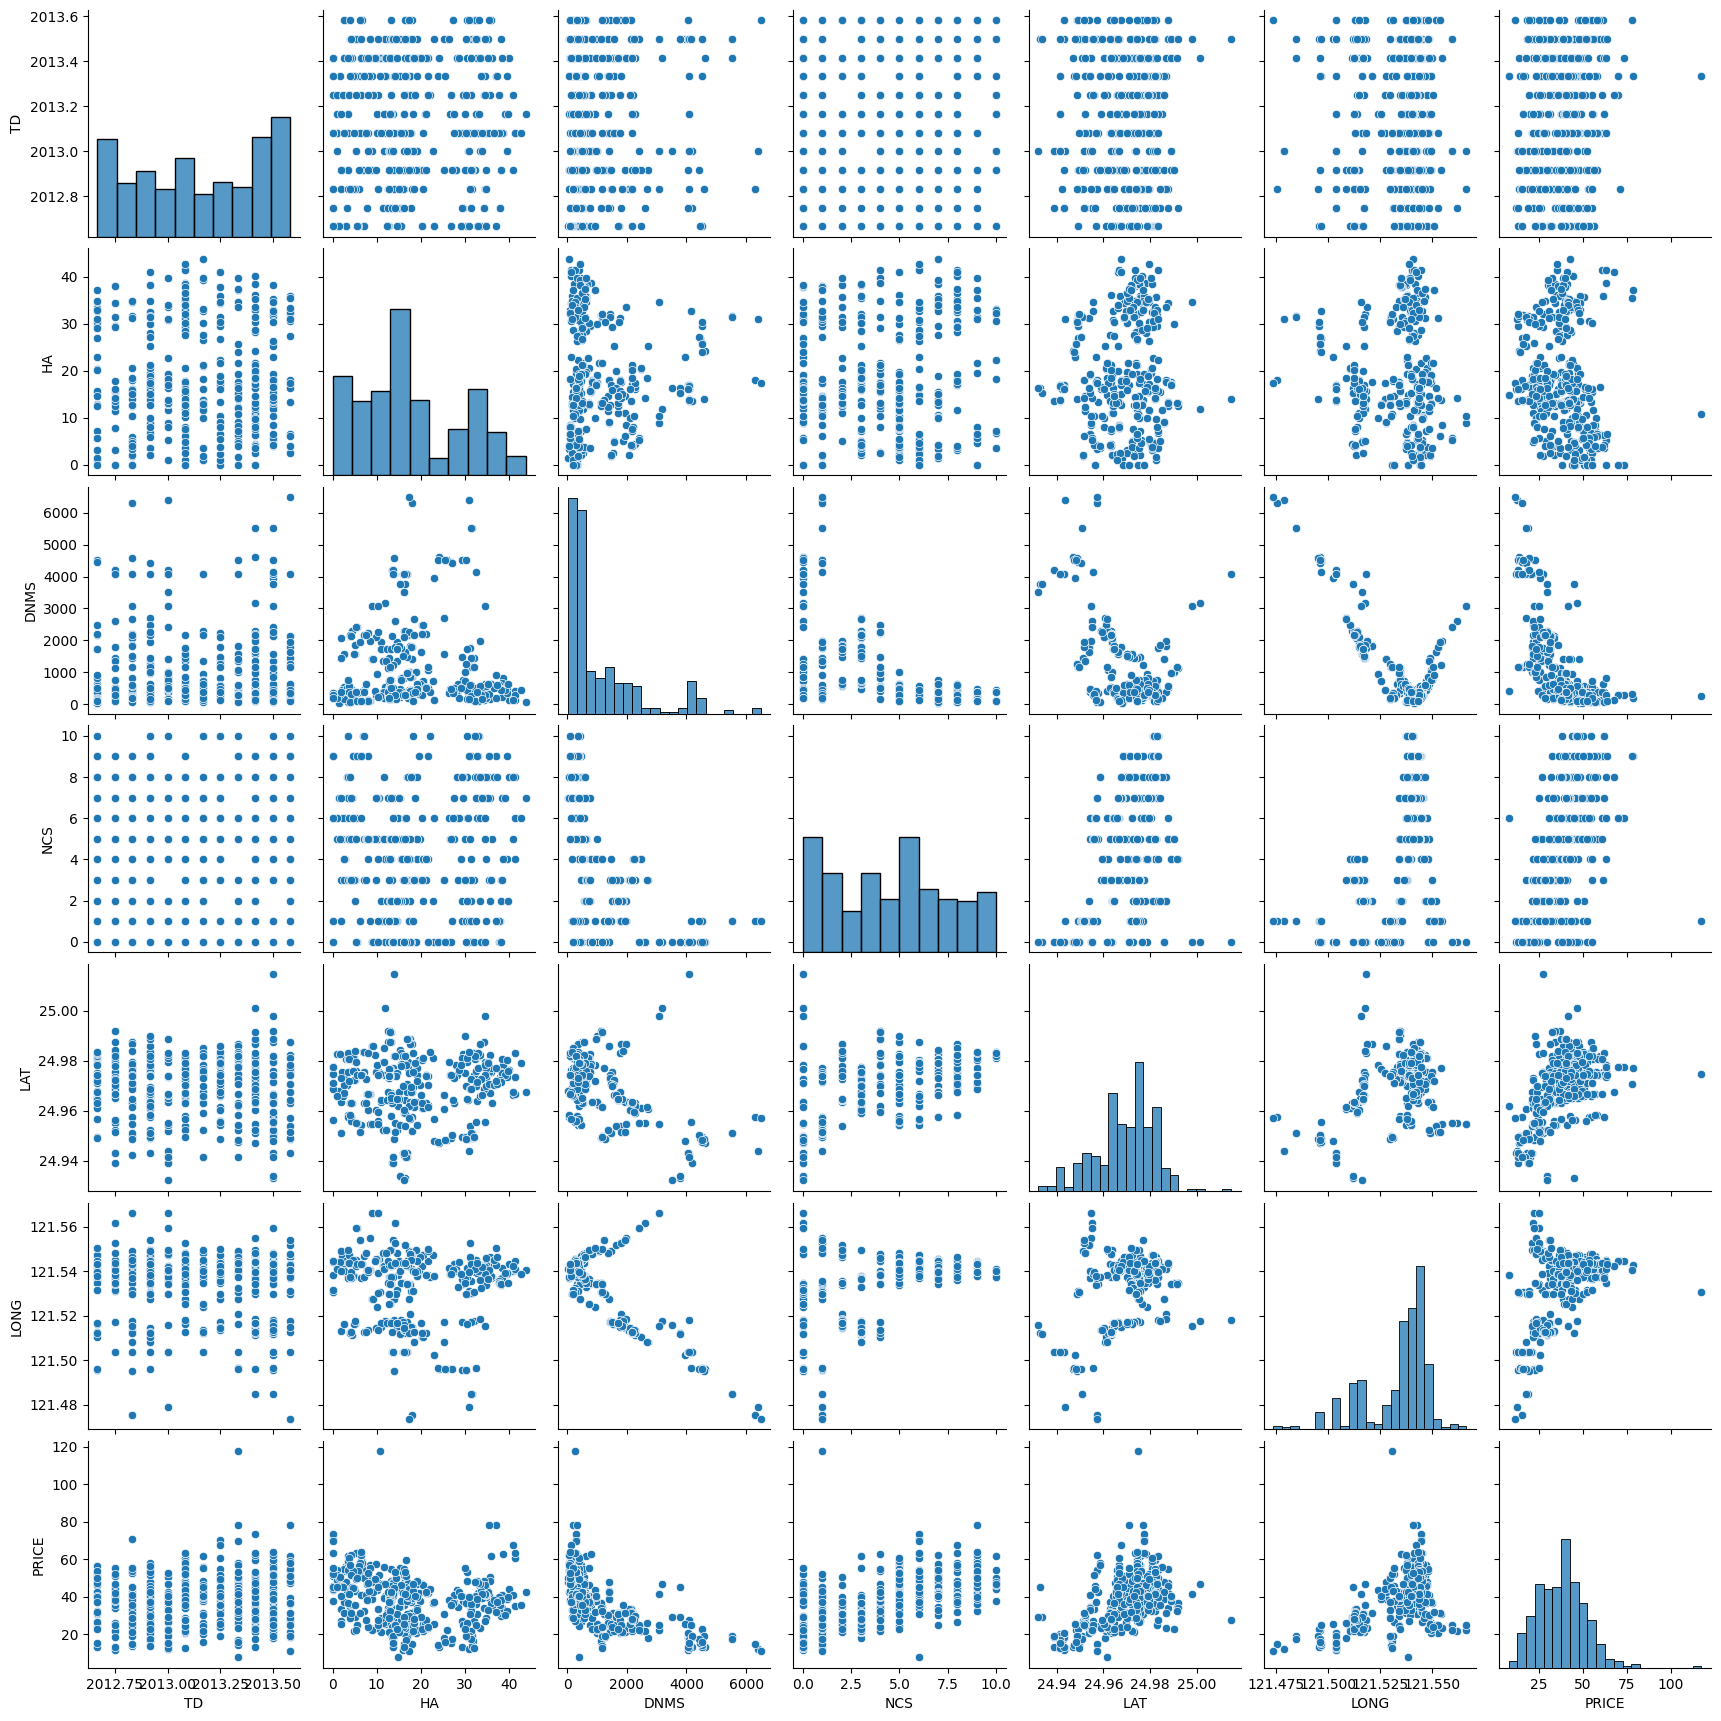

In [13]:
import seaborn as sns
sns.pairplot(dataset)

<Axes: xlabel='DNMS', ylabel='PRICE'>

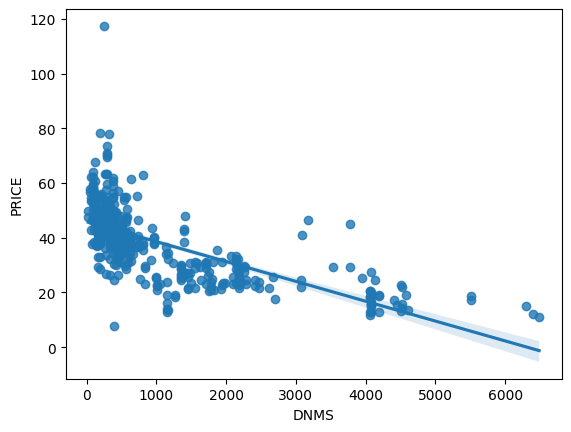

In [14]:
sns.regplot(x="DNMS",y="PRICE",data = dataset)

In [15]:
# dependant and independant features

X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [16]:
X.head()

,TD,HA,DNMS,NCS,LAT,LONG
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [17]:
Y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: PRICE, dtype: float64

### test-train split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 2)

In [19]:
X_train

,TD,HA,DNMS,NCS,LAT,LONG
237,2013.167,13.0,732.8528,0,24.97668,121.52518
146,2012.750,0.0,185.4296,0,24.97110,121.53170
320,2012.750,13.5,4197.3490,0,24.93885,121.50383
150,2013.250,35.8,170.7311,7,24.96719,121.54269
198,2013.083,34.0,157.6052,7,24.96628,121.54196
...,...,...,...,...,...,...
299,2013.167,33.2,121.7262,10,24.98178,121.54059
22,2012.917,14.7,1360.1390,1,24.95204,121.54842
72,2013.583,32.5,424.5442,8,24.97587,121.53913
15,2013.583,35.7,579.2083,2,24.98240,121.54619


In [20]:
X_test

,TD,HA,DNMS,NCS,LAT,LONG
147,2012.750,3.2,489.8821,8,24.97017,121.54494
217,2012.917,28.0,372.6242,6,24.97838,121.54119
277,2013.417,21.2,2185.1280,3,24.96322,121.51237
32,2012.750,37.9,488.5727,1,24.97349,121.53451
182,2013.500,13.5,2147.3760,3,24.96299,121.51284
...,...,...,...,...,...,...
225,2013.250,1.1,193.5845,6,24.96571,121.54089
199,2013.417,18.2,451.6419,8,24.96945,121.54490
12,2012.917,13.0,492.2313,5,24.96515,121.53737
161,2013.417,19.2,616.4004,3,24.97723,121.53767


Standardize the dataset

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_train

array([[ 0.09613175, -0.36300302, -0.23317328, -1.45719681,  0.63265349,
        -0.58948404],
       [-1.39737414, -1.52043522, -0.67708939, -1.45719681,  0.17503443,
        -0.15352022],
       [-1.39737414, -0.3184864 ,  2.57625398, -1.45719681, -2.46980695,
        -2.01706495],
       ...,
       [ 1.58605608,  1.37314527, -0.48318671,  1.25977015,  0.56622492,
         0.34329131],
       [ 1.58605608,  1.65805166, -0.35776659, -0.77795507,  1.10175404,
         0.81536257],
       [-0.20471836,  0.93688237, -0.40974336,  0.24090754, -0.49007142,
         0.61543437]])

In [25]:
X_test

array([[-1.39737414, -1.23552884, -0.43020294,  1.25977015,  0.09876458,
         0.73178055],
       [-0.79925547,  0.97249567, -0.52528965,  0.58052841,  0.77207149,
         0.48103449],
       [ 0.99151897,  0.36706959,  0.94450489, -0.4383342 , -0.47120899,
        -1.44603259],
       [-1.39737414,  1.8539248 , -0.43126476, -1.11757594,  0.37103973,
         0.03437217],
       [ 1.28878752, -0.3184864 ,  0.91389106, -0.4383342 , -0.49007142,
        -1.41460575],
       [ 0.69066886,  0.04654991,  0.63679097, -0.77795507,  1.45603977,
        -0.87500022],
       [-1.39737414, -0.13151658, -0.21702455, -0.77795507,  0.73680694,
         0.03437217],
       [-1.39737414,  1.86282813, -0.45298759, -1.45719681,  0.27262702,
         0.03036023],
       [ 0.3934003 ,  0.1533898 , -0.51041301,  0.92014928,  0.84178049,
         0.39210322],
       [ 1.58605608, -0.9328158 , -0.75410528,  1.59939102,  0.43992862,
         0.60874781],
       [-0.50198692, -0.79926593, -0.74246531,  0.

## Model Training

In [26]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [27]:
regression.fit(X_train, Y_train)

LinearRegression()

In [30]:
import pickle

In [31]:
with open('scaling.pkl', 'wb') as file:
    pickle.dump(regression, file)

In [32]:
with open('scaling.pkl', 'rb') as file:
    regression = pickle.load(file)

In [33]:
# print the coefficient
print(regression.coef_)

[ 1.3502594  -3.57257646 -5.1183011   3.85499761  2.37282631  0.13715601]


In [34]:
# print the intercept
print(regression.intercept_)

38.317993079585754


In [35]:
# on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Prediction:

In [36]:
reg_pred = regression.predict(X_test)

In [37]:
reg_pred

array([48.23823514, 40.58897027, 30.50494985, 28.59210489, 33.47178462,
       36.16088716, 36.76583985, 27.1281769 , 46.51198766, 54.94489   ,
       44.8525699 , 33.26583417, 44.64520166, 55.70037277, 51.60856132,
       31.64522966, 41.65227693, 35.41674251, 16.00345574, 24.05246778,
       40.51439101,  8.82052486, 42.12879414, 39.03553552, 25.77751379,
       31.60872768, 27.56436519, 50.80136592, 22.58942402, 44.31060076,
       55.17519238, 41.43466281, 39.58473679, 46.85343474, 30.77284435,
       27.9033688 , 48.18220896, 30.31697563, 32.59954962, 22.19305137,
       31.10205961, 26.51418398, 54.39133012, 33.26836162, 34.84192661,
       43.36716086, 46.21604062, 23.26180955, 35.40231181, 28.69448954,
       32.58852978, 41.189766  , 44.76976193, 41.97684896, 47.14334869,
       43.09191266, 44.8096564 , 10.50904344, 48.49707236, 42.67220832,
       12.33339342, 48.4918469 , 22.32320895, 47.39135145, 30.24558384,
       37.8141599 , 50.66882347, 29.91435494, 26.15233672, 14.90

Let's plot some assumptions to see how well the model has performed

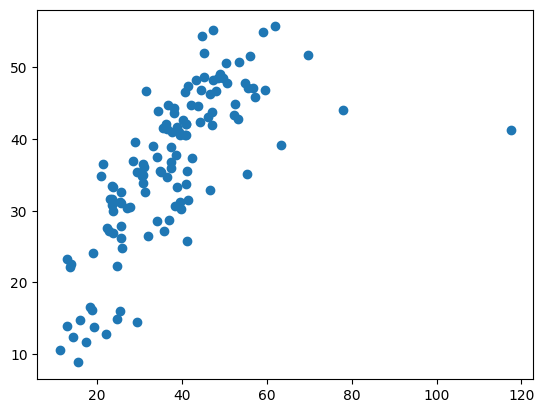

In [38]:
# plot a scatter plot daigram
plt.scatter(Y_test,reg_pred)

In [39]:
# residuals
residuals= Y_test - reg_pred

In [40]:
residuals

147    -5.038235
217     0.211030
277    -2.804950
32      5.607895
182    -9.871785
         ...    
225    -0.030481
199   -15.110930
12     -1.644921
161    -1.010486
13     -3.026785
Name: PRICE, Length: 125, dtype: float64

d:\AIML\FinalProject\HousePricePrediction\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


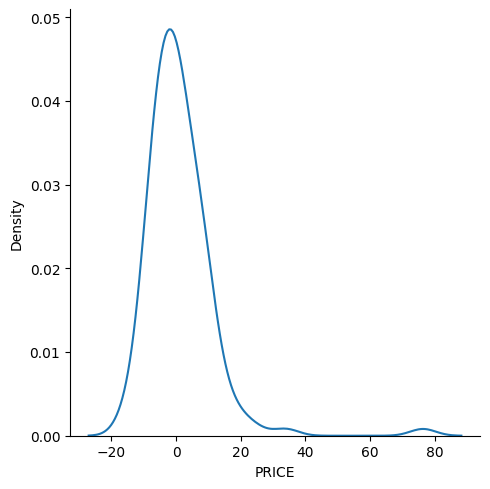

In [41]:
# plot these residuals
sns.displot(residuals, kind="kde")

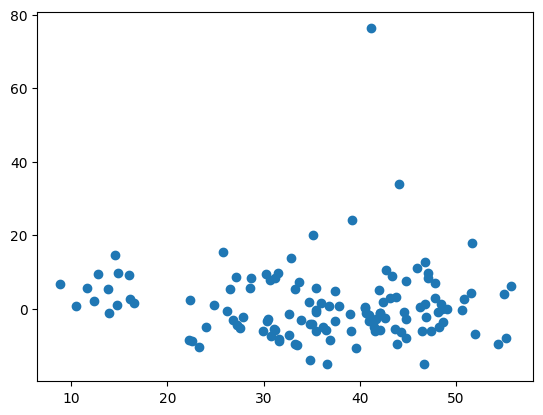

In [42]:
# plot a scatter plot with respect to prediction and residuals
# uniform distribution
plt.scatter(reg_pred, residuals)

## Performance Metrics:

In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_absolute_error(Y_test,reg_pred))
print(mean_squared_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

6.548056014757489
107.91224775245014
10.388082005473876


Formula: R2 = 1 - SSR/SST

where;

R2 is coefficient of determination, SSR is Sum of Squares of Residuals and     SST is Total Sum of Squares

In [44]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,reg_pred)
print(score)

0.5076192718868104


Formula: Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]

where;

R2 is R2 score, n is number of observations and K is number of predictor variables

In [45]:
# there are no in built function to get adjusted R2
# run following code can print it for you...
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.4825829636776652

## Pickle the model for deployment

In [46]:
import pickle

In [48]:
with open('reg_model.pkl', 'wb') as file:
    pickle.dump(regression, file)

In [49]:
with open('reg_model.pkl', 'rb') as file:
    regression = pickle.load(file)

to delete a pickle file;

In [50]:
"""
import os

pickle_file_path = "pickle_file_path"

if os.path.exists(pickle_file_path):
    try:
        os.remove(pickle_file_path)
        print(f"Successfully deleted {pickle_file_path}")
    except Exception as e:
        print(f"Error deleting {pickle_file_path}: {e}")
else:
    print(f"The file {pickle_file_path} does not exist.")
    
"""

'\nimport os\n\npickle_file_path = "pickle_file_path"\n\nif os.path.exists(pickle_file_path):\n    try:\n        os.remove(pickle_file_path)\n        print(f"Successfully deleted {pickle_file_path}")\n    except Exception as e:\n        print(f"Error deleting {pickle_file_path}: {e}")\nelse:\n    print(f"The file {pickle_file_path} does not exist.")\n    \n'